# Semsterarbeit Teil3: Diskrete Kosinustransformation (DCT)

Autor: Chantale Gihara

Datum: 10.12.2021

## Auftrag


* Erstellen Sie ein Dokument mit einer Beschreibung der diskreten Kosinustransformation.
* Erstellen Sie Python-Funktionen, die die eindimensionale Kosinustransformation und die entsprechende Rücktransformation ausführen; dazu soll eine Pythonfunktion erstellt werden, die die Transformationsmatrix erzeugt.
* Beschreiben Sie, wie die zweidimensionale Kosinustransformation definiert ist.
* Verwenden Sie die diskrete Kosinustransformation aus Scipy scipy.fftpack.dct und verschiedene Arten von Bildern zu transformieren (insbesondere Fotos und Linienzeichnungen). Interpretieren Sie die Resultate.
* Hilfsmittel: Numpy, (allenfalls Scipy oder sympy); Jupyter Notebook oder Python-IDE.

Das Notetebook soll neben dem lauffähigen Code in Markedown Zellen eine theoretische Beschreibung der theoretischen Grundlagen und der Umsetzung mit Python enthalten.


## Einführung in die diskrete Kosinustransformation

### Herleitung ohne Mathematischen Beweis
Weitz hat in seinem Buch [10] die DCT sehr plausibel dargestellt: Die diskrete Kosinustransformation (DCT) wird in vielen Bereichen eingesetzt, der bekannteste ist wohl die Komprimierung im Bereich von Videos, Audio und in der Verarbeitung von Bildern, ein Beispiel dafür ist Jpeg. Werden die mathematische Herleitung und die Beweise weggelassen, so kann es sehr verständlich erklärt werden.

Er fasst es so zusammen: Beginnend mit der Kosinusfunktion zwischen 0 und $\pi$ nimmt die Funktion an den Punkten dazwischen ab. Der Interval zwischen 0 und $\pi$ wird in drei gleich grosse Teile geschnitten, dabei wird deren Mittelpunkte, x = $\frac{\pi}{6}$, x = $\frac{\pi}{2}$, $\frac{5\pi}{6}$. Die Kosinus Werte an diesen Punkten sind -1, 1 und 0. Dafür werden die Grautöne übersetzt, also für -1 Schwarz, 1 Weiss und 0 ein mittleres Grau.

Das wird nur mit der Funktion $x\mapsto$ $\cos(x)=\cos(1x)$, wie auch mit $x\mapsto$ $\cos(2x)$ und mit $x\mapsto \cos(0x)=1$. Dabei entstehend somit 3 Vektoren, die als 3 Rechtecke interpretiert werden können. Diese bestehen als drei grauen Blöcke:

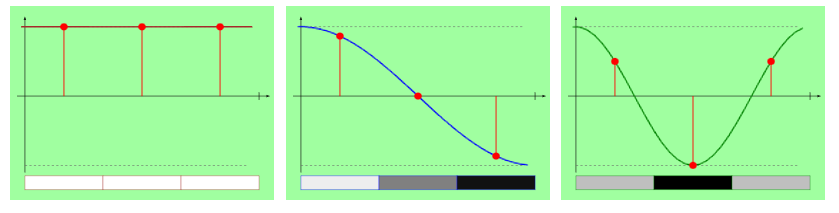

Diese drei Vektoren (1,1,1), ($\frac{3}{√2},0,\frac{-3}{√2}$) und ($\frac{1}{2},-1,\frac{1}{2}$) sind linear unabhängig, was wiederum bedeutet, dass jeder Vektor von drei Zahlen als Linearkombination von ihnen ausgedrückt werden kann. Was bedeutet, dass jedes Bild, das aus drei Graustufenpixeln besteht, mit Hilfe der drei "Legosteine" zusammengesetzt werden kann.
1)![Lego_brick_white](Lego_brick_white.png)
2)![Lego_brick_white_grey_black](Lego_brick_white_grey_black.png) 
3)![Lego_brick_gray_black_gray](Lego_brick_gray_black_gray.png)

Um das Bild der Grauwerte mit dem Vektor:

$\begin{bmatrix}
  0.9294\\
  0.2000 \\
  0.0667
 \end{bmatrix}$
 
zu erhalten passiert folgendes bildlich: ![add_bricks](add_bricks.png)

Dabei ergibt sich ein lineares Gleichungssystem:

$0.92940 = \alpha +\frac{3}{\sqrt2} \beta + \frac{1}{2} \gamma$

$0.2000 = \alpha - \gamma$

$0.0667 = \alpha +\frac{3}{\sqrt2} \beta + \frac{1}{2} \gamma$,

was folgendes ergibt:
$\alpha$ ≈0.3987, $\beta$≈0.4981, und $\gamma$≈0.1987.
Die «graphische Gleichung» von oben hat also die Lösung ![solution](solution.PNG).
Ein weiterer Schritt ist nun die Funktionen x$\mapsto$cos(3x) und x$\mapsto$cos(4x) hinzuzufügen und nun alle fünf Funktionen an fünf anstatt den drei äquidistanten Punkten abzufragen. Dabei werden mehrere und grössere «Legosteine», mit denen alle Bilder, die aus 5 Pixeln bestehen, rekonstruiert werden können.

Dabei können in diesem Beispiel von Weiz die Probepunkten in einem drei mal drei Quadrat angeordnet werden. Dabei wird die Kosinusfunktion in eine Richtung und eine andre in senkrechte Richtung verlaufen. Das Skalarprodukt der beiden Funktionen ergibt die Werte, die die Grautöne bestimmen.

![base_pattern](base_pattern.png)

Die Muster wurden auf eine bestimmte Weise angeordnet. Von links nach rechts in der Tabelle, wird zunehmende horizontale Veränderung in dem Muster beobachtet. Von unten nach oben, wird zunehmend eine vertikale Veränderung wahrgenommen. Wird die diagonal Tabelle gemäss der Musternummerierung durchlaufen, bewegen sich die Muster von ohne jegliche Variation zu den mit unterschiedlichsten Variationen.

![pattern_table](pattern_table.png)


[10]

Weiz hat mit dieser Form von Ausführung, dass Thema verständlich näher gebracht ohne, den mathematischen Hintergrund zu erklären. 
Im nächsten Abschnitt, wird dieser näher angeschaut.


## Mathematische Herleitung der diskreten Kosinustransformation

### Transformation
Bevor direkt die DCT angeschaut wird, sollte erst die Berechnungen der Transformation verstanden werden.

Definition des Begriffes wie Stützstellendarstellung und Koeffizientendarstellung. Hier werden die Ausschnitte aus dem Skript von H.W Lang verwendet. [11]

***Definition***: Es seien $n$ verschiedene Stützstellen $x_0, ..., x_{n-1}$ gegeben. Sei f($_x$) eine Funktion und seien y$_j$
= f($x_{ij}$) die Funktionswerte der Funktion an diesen Gitterpunkten (j = 0, ..., n-1).
Dann wird der Vektor [$y_0, ..., y_{n-1}$] die Stützstellendarstellung der Funktion f(x) genannt.

***Definition***: Es seien $n$ Basisfunktionen $c_0(x), ..., c_{n-1}(x)$ gegeben. Sei f(x) eine Funktion, die als gewichtete Summe dieser Basisfunktionen ausgedrückt werden kann:

* f(x) = $a_0-c_0(x) + ... + a_{n-1}-c_{n-1}(x)$.

Der Vektor [$a_0, ..., a_{n-1}$] wird die Koeffizientendarstellung der Funktion f(x) genannt.
Betrachtung des Problems der Berechnung der Unsterstützungsdarstellung von f(x) aus der Koeffizentendarstellung einer Funktion f(x).

Ist die die Funktion f(x) in der Koeffizientendarstellung gegeben, somit die gewichtete Summe von $n$ der Basisfunktionen $c_i(x)$ gegeben:

* f(x) = $a_0-c_0(x) + ... + a_{n-1}-c_{n-1}(x)$.

Den Funktionswert $y_j$ an einem einzelnen Gitterpunkt $x_j$ erhält man durch Substitution:

* $y_j$ = $a_0-c_0(x_j) + ... + a_{n-1}-c_{n-1}(x_j)$.

In Vektorschreibweise ist dies $y_j$ = $[a_0, ..., a_{n-1}] * $
$\begin{bmatrix}
c_0(x_i)\\
. \\
. \\
. \\
C_{n-1}(x_j) 
 \end{bmatrix}$
 
Entsprechend kann der Vektor der Funktionswerte an den $n$ Stützstellen $x_0, ..., x_{n-1}$ demnach durch ein Produkt mit einer Matrix, der Transformationsmatrix T, dargestellt werden:
$[y_0 ... y_{n-1}] = [a_0 ... a_{n-1}] $ * 	\begin{bmatrix}
c_0(x_0) && … && c_0{xn-1}(x_j) 
...\\
...\\
... \\
...\\
c_{n-1}(x_0) &&…&& c_{n-1}(x_{n-1})
\end{bmatrix} 
Die Stützstellendarstellung der Funktion f(x) kann also aus der Koeffizientendarstellung durch Multiplikation mit der Transformationsmatrix T erhalten werden:
$[y_0 ... y_{n-1}] = [a_0 ... a_{n-1}] * T.$
Die Transformationsmatrix T hängt nur von der Wahl der Basisfunktionen$ c_i(x)$ und der Stützstelle $x_j$ab. Wenn die Stützstelle und die Basisfunktionen richtig gewählt sind, kann die Matrix T invertiert werden.
Umgekehrt kann die Koeffizientendarstellung aus der Stütztendarstellung durch Multiplikation mit der inversen Transformationsmatrix $T^{-1}$ gewonnen werden:
$[y_0 ... y_{n-1}]*T^{-1} = [a_0 ... a_{n-1}]$
Mit einer invertierbaren Transformationsmatrix T ist es möglich, zwischen der Koeffizientendarstellung und der Stützstellendarstellung beliebig hin und her zu transformieren.

[11]



### Diskrete Kosinustransformation (DTC)

Bei der diskreten Kosinustransformation werden als Basisfunktionen die Kosinusfunktionen $c_i(x) = \cos(i·x)$ und als Stützstellen die Werte $x_j = (j+1/2)*\frac{π}{n}$ verwendet. Siehe folgende Graphik:

In dieser Graphik sind für den Fall n = 4 die Basisfunktionen $\cos(i·x)$ und die Stützstellen $(j+\frac{1}{2})*\frac{π}{n}$ dargestellt (i, j Element {0, ..., 3})

![cos](cos.gif)

Die Kosinusfunktionen $c_i$ noch mit konstanten Faktoren $s_i$ skaliert, und zwar ist:

* $s_0  =  \frac{1}{\sqrt n}$
* $s_i  =  \frac{\sqrt 2}{\sqrt n}$ wenn  i > 0.

Das ergibt die Transformationsmatrix T => $T_{i,j} = s_i * c_i(x_j) = s_i * cos(i*(j+\frac{1}{2})*\frac{π}{n})$ für alle i und j Elemente in {0,.....,n-1}.

Es wird weiter beschrieben, dass für die Transformationsmatrix T folgendes gilt: $T^{-1} = T^{T}$, die Inverse von wird durch das Transpornieren von T berechnet.

Steht für n = 4 ist die Transformationsmatrix wie folgt:


T  =  $\begin{bmatrix}
0.5 && 0.5 && 0.5 && 0.5 \\
0,653 && 0,271	&& -0,271&& -0,653 \\
0,5	&& -0,5	&& -0,5&& 	0,5 \\
0,271 && -0,653	&& 0,653 && -0,271
 \end{bmatrix}$  	

Die diskrete Kosinustransformation ist definiert als Umwandlung von der Stützstellendarstellung in die Koeffizientendarstellung. Entsprechend ist der zu transformierende Vektor $[y0 ... y_{n-1}]$ mit $T^{-1} = T^{T}$ zu multiplizieren:

$[y0 ... yn-1]$ * $T^{T}$ = [$a_0 ... a_{n-1}$]

Die Auswertung dieser Vektor-Matrix-Multiplikation liefert für n = 8 die in der Literatur häufig genannte Formel für die diskrete Kosinustransformation. Wenn n festliegt, werden die Werte $T_{i,j}$ der Transformationsmatrix allerdings zweckmässigerweise im Voraus berechnet und gespeichert, daher wird diese Formel in dieser Form dann nicht benötigt:

$a_j   =  \sum_{i = 0, ..., 7} *y_i * T_{j,i}$

$= \sum_{i = 0, ..., 7}  * y_i * s_j * cos(j·(i+\frac{1}{2})*\frac{π}{8})$
      
$= s_j * \sum_{i = 0, ..., 7} * y_i * cos(j·(2i+1)*\frac{π}{16})$

mit  $s_0 = \frac{1}{\sqrt8}=\frac{\sqrt2}{4} $
und  $s_j =  \frac{2}{\sqrt8} =\frac{1}{2} für j > 0$.

[11]

### 2-D diskrete Kosinustransformation

Diese wird im Beispiel in zur Umsetzung mit Python verwenden, dort werden die Bilddaten verarbeitet. 
J.Mauche [5] erklärt die 2-dimensionale diskrete Kosinustranformation, wie folgt:
Bei Bilddaten wird nicht ein Vektor verabeitet sondern eine n × n-Matrix Y von Grauwerten zu transformieren. Diese 2-dimensionale Transformation lässt sich auf die 1-dimensionale Transformation zurückführen.

Zunächst werden alle Zeilenvektoren der Matrix Y in 1-Dimensional transformiert, somit wird diese mit der inversen Transformationsmatrix $T^{T}$ multipliziert.

Dies entspricht einer Matrixmultiplikation ***Y * $T^{T}$ = A.***

Das Resultat daraus A ist eine n × n-Matrix, deren Zeilenvektoren die Ergebnisvektoren der 1-dimensionalen Transformationen sind.

Nun werden die Spaltenvektoren der Matrix A 1-dimensional transformiert. Realisiert wird dies, indem A transponiert und mit $T^{T}$ multipliziert wird. Das Ergebnis wird erneut transponiert.

Dies entspricht der Matrixmultiplikation

$(A*T * T^{T})^T =   T * A.$

Insgesamt wird also gerechnet 

$B  =  T * Y * T^{T}$

somit wird eine zwei Matrixmultiplikationen ausgeführt. Die Matrix B ist das Ergebnis der 2-dimensionalen diskrete Kosinustransformation der Matrix Y.
[11]

## Zur Umsetzung mit Python

Da im Auftrag beschrieben wurde welche Hilfsmittel verwendet wurden, habe ich mir erlaubt. 2 verschiede Kosinustranformation mit einem importierten Bild aus Hardwar Indien darzustellen. 
Die erste Bildtransformation wird gemäss Auftrag ausgeführt, die zweite Transformation wird mit der Library opencv-python durchgeführt. 
OpenCV (Open Source Computer Vision Library) ist eine Bibliothek mit Programmierfunktionen, die hauptsächlich für die Echtzeit-Computerbildverarbeitung gedacht ist. Ursprünglich von Intel entwickelt, wurde sie später von Willow Garage und dann von Itseez (das später von Intel übernommen wurde) unterstützt. Die Bibliothek ist plattformübergreifend und kann unter der Open-Source-Lizenz Apache 2 frei verwendet werden. Seit 2011 bietet OpenCV GPU-Beschleunigung für Echtzeitoperationen. [2]

Um die 1-d Transformation darzustellen habe ich ein paar Funktionen von Markus Geuss [1] abgeschaut, um die Basis darzustellen.
Im zweiten Teil der 2-d Transformation habe ich dann verschiedene Vorlagen verwendet und diese verknüpft. 

In [1]:
# Importieren der Bibliotheken und deren Funktionen
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc  # pip install Pillow
import cv2
import matplotlib.pylab as pylab
from scipy.fftpack import dct
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

Zuerst sollte die Stützstellen berechnet werden. Diese Formel haben ich von der Arbeit von M.Geuss [1] übernommen.

In [2]:
def support_points(n) :
    return np.pi * np.arange(1/(2*n), 1 , 1 / n)

In [3]:
def norming_factor(n, i) :
    if i == 0 : return np.sqrt(1/n)
    else : return np.sqrt(2/n)

In [4]:
#Zeigt die Basisvektoren für die DCT für A^n in graphischer Darstellung
# dcb => discret cosinus basis
plt.figure(figsize=(9,12))
def show_dcb(n) :
    x_disc = support_points(n)
    x_cont = np.linspace(0, np.pi, 1000)
    for i in range(n) :
        plt.subplot(2, 4, i+1)
        plt.subplots_adjust(hspace = 1)
        plt.ylim((-1, 1))
        plt.plot(x_cont, np.cos(i*x_cont) * norming_factor(n, i), color='orange')
        plt.plot(x_disc, np.cos(i*x_disc) * norming_factor(n, i), 'go')
        plt.title("i="+str(i))

<Figure size 648x864 with 0 Axes>

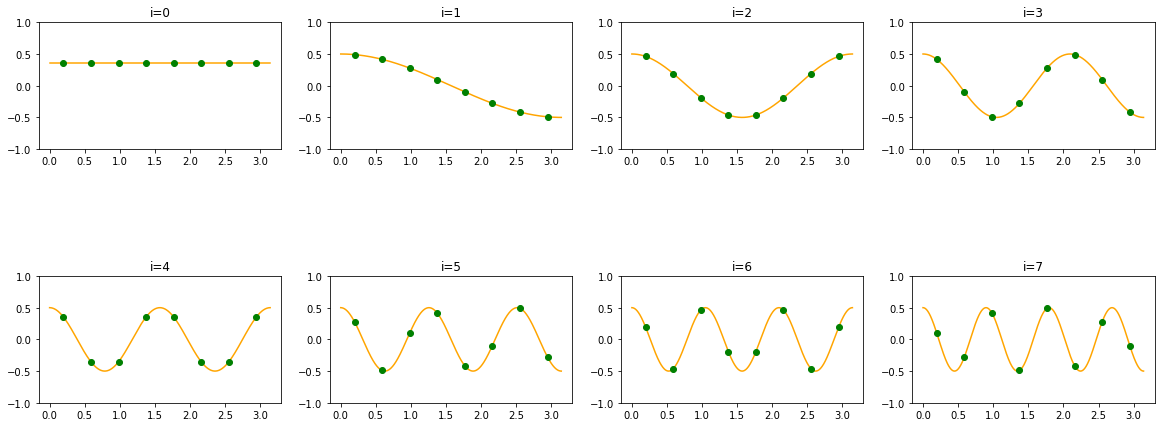

In [5]:
#n => 8
show_dcb(8)

In [6]:
def DCT(n) :
    x = support_points(n)
    vec = [np.cos(i*x) * norming_factor(n,i) for i in range(n) ]
    return np.array(vec).T

# Testen der diskreten Kosinustranformationfunktion mit n = 3
DCT(3)

array([[ 5.77350269e-01,  7.07106781e-01,  4.08248290e-01],
       [ 5.77350269e-01,  4.99959962e-17, -8.16496581e-01],
       [ 5.77350269e-01, -7.07106781e-01,  4.08248290e-01]])

Zur Transformation muss die transponierte Matrix mit der Matrix multipliziert werden, die Matrix-Werte sollten gerundet werden zu 8 Positionen.

In [7]:
abs(np.round(DCT(3).T @ DCT(3), 8))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Somit ist hier die Orgonalität bewiesen.

Dieselbe Idee kann auf 2D-Bilder anstelle von 1D-Vektoren angewendet werden, indem die 1D-Transformation auf jede Zeile und Spalte des Bildes angewendet wird.

Die 2D-Basisbilder für N=2 sind dann die äußeren Produkte der 1D-Basisvektoren. Von der niedrigsten (0,0) bis zur höchsten (1,1) Ortsfrequenz lauten diese Basisbilder:

In [8]:
basis = (1/np.sqrt(2) * np.array([1, 1]), 1/np.sqrt(2) * np.array([1, -1]))
for i in [0,1]:
    for j in [0,1]:
        print("{}, {} :".format(i,j))
        print(np.outer(basis[i], basis[j]))
        print()

0, 0 :
[[0.5 0.5]
 [0.5 0.5]]

0, 1 :
[[ 0.5 -0.5]
 [ 0.5 -0.5]]

1, 0 :
[[ 0.5  0.5]
 [-0.5 -0.5]]

1, 1 :
[[ 0.5 -0.5]
 [-0.5  0.5]]



Bei einen entsprechenden Bild mit 4 folgenden Koeffizienten f= $\begin{bmatrix}
5 && 8\\
4 && -1
 \end{bmatrix}$

n = 8
Bei der JPEG-Bildkomprimierung wird die gleiche Art von Transformation verwendet, jedoch mit 8 statt 2 Koeffizienten.

Die Matrix ist durch diese Formel definiert wie im Theorieteil 


In [9]:
# 8 x 8 DCT Matrix
n = 8
dct = np.zeros((n, n))
for x in range(n):
    dct[0,x] = np.sqrt(2.0/n) / np.sqrt(2.0)
for i in range(1,n):
    for x in range(n):
        dct[i,x] = np.sqrt(2.0/n) * np.cos((pi/n) * i * (x + 0.5) )
        
np.set_printoptions(precision=3)
dct

array([[ 0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354],
       [ 0.49 ,  0.416,  0.278,  0.098, -0.098, -0.278, -0.416, -0.49 ],
       [ 0.462,  0.191, -0.191, -0.462, -0.462, -0.191,  0.191,  0.462],
       [ 0.416, -0.098, -0.49 , -0.278,  0.278,  0.49 ,  0.098, -0.416],
       [ 0.354, -0.354, -0.354,  0.354,  0.354, -0.354, -0.354,  0.354],
       [ 0.278, -0.49 ,  0.098,  0.416, -0.416, -0.098,  0.49 , -0.278],
       [ 0.191, -0.462,  0.462, -0.191, -0.191,  0.462, -0.462,  0.191],
       [ 0.098, -0.278,  0.416, -0.49 ,  0.49 , -0.416,  0.278, -0.098]])

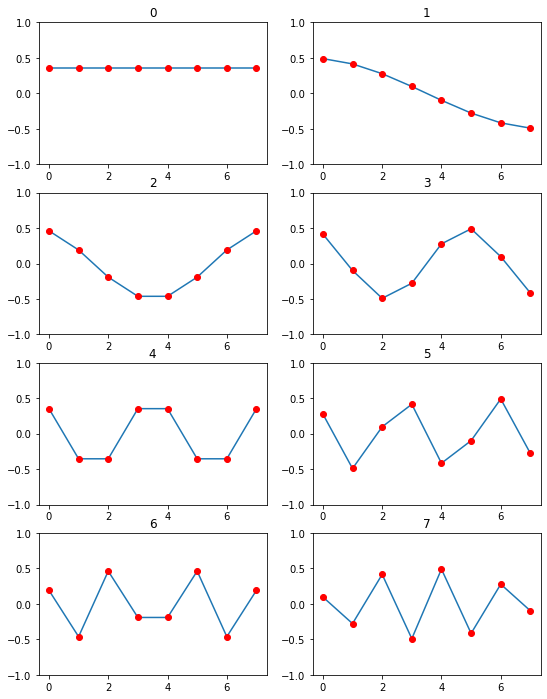

In [10]:
# Hier die Graphiken dazu
plt.figure(figsize=(9,12))
for i in range(n):
    plt.subplot(4, 2, i+1)
    plt.ylim((-1, 1))
    plt.title(str(i))
    plt.plot(dct[i, :])
    plt.plot(dct[i, :],'ro')

Wie im Fall n=2 sind die Vektoren ortognonal. Ihre Punktprodukte sind 0, und jedes hat die Länge 1. Hier sind ein paar Beispiele für Produkte.

In [11]:
def rowdot(i,j):
    return np.dot(dct[i, :], dct[j, :])
rowdot(0,0), rowdot(3,3), rowdot(0,3), rowdot(1, 7), rowdot(1,5)

(0.9999999999999999,
 1.0,
 5.551115123125783e-17,
 1.942890293094024e-16,
 -2.498001805406602e-16)

Dies bedeutet auch, dass die Inverse dieser Matrix nur ihre Transponierte ist.

In [12]:
dct_transpose = dct.transpose()
dct_transpose

array([[ 0.354,  0.49 ,  0.462,  0.416,  0.354,  0.278,  0.191,  0.098],
       [ 0.354,  0.416,  0.191, -0.098, -0.354, -0.49 , -0.462, -0.278],
       [ 0.354,  0.278, -0.191, -0.49 , -0.354,  0.098,  0.462,  0.416],
       [ 0.354,  0.098, -0.462, -0.278,  0.354,  0.416, -0.191, -0.49 ],
       [ 0.354, -0.098, -0.462,  0.278,  0.354, -0.416, -0.191,  0.49 ],
       [ 0.354, -0.278, -0.191,  0.49 , -0.354, -0.098,  0.462, -0.416],
       [ 0.354, -0.416,  0.191,  0.098, -0.354,  0.49 , -0.462,  0.278],
       [ 0.354, -0.49 ,  0.462, -0.416,  0.354, -0.278,  0.191, -0.098]])

überprüfung des Produktproduktes der Matrix mit der Transpornierten Matrix

In [13]:
same = np.dot(dct, dct_transpose)

# Since there are many nearly zero like 3.2334e-17 in this numerical result,
# the output will look much nicer if we round them all of to (say) 6 places.
roundoff = np.vectorize(lambda m: round(m, 6))
abs(roundoff(same))

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

### Jpeg Bild Komprimierung
Um das Ganze zu verdeutlichen, wollen wir die 2D-DCT-Transformation auf einen Teil eines echten Bildes anwenden.
Hier ist eines der bekannten Bilder der Mona - Lisa. Ich werde verschiedene Methoden angehen. 

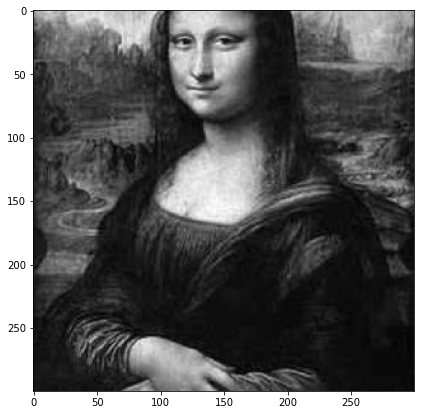

In [14]:
img_mona = mpimg.imread('graue_monalisa.jpg')
plt.imshow(img_mona, cmap="gray")

In [15]:
img_mona.shape

(300, 300)

Alle drei R-, G- und B-Farbwerte im Graustufenbild sind für jedes Pixel gleich.

Betrachtet man die Werte eines winzigen 8 x 8-Blocks (der bei der JPEG-Kompression verwendet wird) in der Nähe seiner Nase.

(Die nächsten Bilder verwenden ein falsches Farbspektrum zur Darstellung der Pixelintensität).

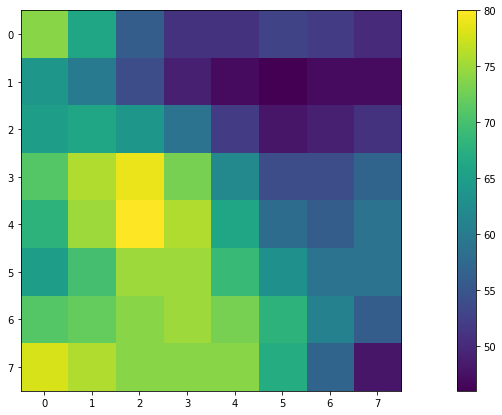

In [16]:
tiny = img_mona[40:48, 40:48]  #8x8 

def show_image(img_mona):
    plt.imshow(img_mona)
    plt.colorbar()

show_image(tiny)

In [17]:
# Die "tiny" Matrix
tiny

array([[74, 66, 56, 51, 51, 53, 52, 50],
       [64, 60, 54, 49, 47, 46, 47, 47],
       [65, 66, 64, 59, 52, 48, 49, 51],
       [71, 76, 79, 73, 62, 54, 54, 57],
       [68, 75, 80, 76, 66, 58, 56, 59],
       [65, 70, 75, 75, 69, 63, 59, 59],
       [71, 72, 74, 75, 73, 68, 61, 56],
       [78, 76, 74, 74, 74, 67, 57, 48]], dtype=uint8)

Jetzt wird die 2D-Version der oben beschriebenen N=8-DCT definiert

Der Trick besteht darin, die 1D-DCT auf jede Spalte und dann auch auf jede Zeile anzuwenden, $B=DCT * f * DCT^T$

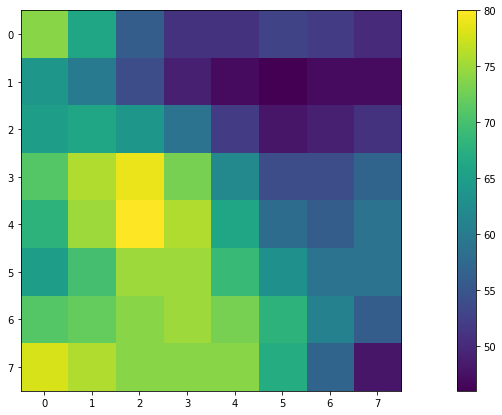

In [18]:
def doDCT(grid):
    return np.dot(np.dot(dct, grid), dct_transpose)

def undoDCT(grid):
    return np.dot(np.dot(dct_transpose, grid), dct)

# test : do DCT, then undo DCT; should get back the same image.
tiny_do_undo = undoDCT(doDCT(tiny))

show_image(tiny_do_undo) # Yup, looks the same.

In [19]:
# Die Zahlen sind die selben in der Matrix
tiny_do_undo

array([[74., 66., 56., 51., 51., 53., 52., 50.],
       [64., 60., 54., 49., 47., 46., 47., 47.],
       [65., 66., 64., 59., 52., 48., 49., 51.],
       [71., 76., 79., 73., 62., 54., 54., 57.],
       [68., 75., 80., 76., 66., 58., 56., 59.],
       [65., 70., 75., 75., 69., 63., 59., 59.],
       [71., 72., 74., 75., 73., 68., 61., 56.],
       [78., 76., 74., 74., 74., 67., 57., 48.]])

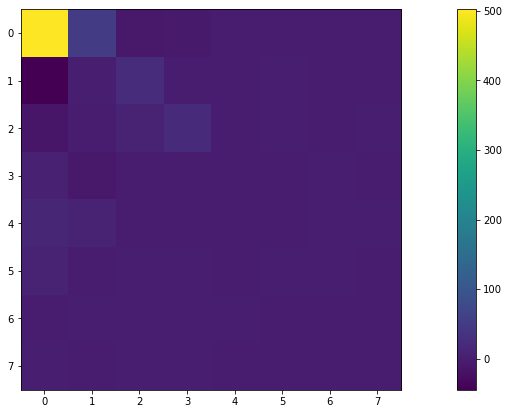

In [20]:
tinyDCT = doDCT(tiny)
show_image(tinyDCT)

In [21]:
round6 = np.vectorize(lambda m: '{:4.1f}'.format(m))
round6(tinyDCT)

array([['502.2', '51.9', '-8.2', '-6.3', ' 0.0', '-0.2', '-0.1', ' 0.0'],
       ['-44.8', ' 0.5', '24.0', '-0.0', '-0.3', ' 0.2', '-0.2', '-0.1'],
       ['-12.0', '-0.3', ' 6.6', '20.2', '-0.2', ' 0.1', '-0.4', ' 0.2'],
       [' 5.9', '-7.8', '-0.1', '-0.2', ' 0.0', '-0.0', ' 0.7', '-0.7'],
       ['14.0', ' 9.2', '-0.2', '-0.1', '-0.2', '-0.3', ' 0.1', ' 0.2'],
       [' 9.7', '-0.2', ' 0.1', ' 0.2', '-0.1', ' 0.5', ' 0.2', '-0.3'],
       ['-0.2', ' 0.2', ' 0.1', ' 0.4', ' 0.1', '-0.0', '-0.1', '-0.4'],
       [' 0.3', '-0.4', ' 0.4', ' 0.3', '-0.2', '-0.2', ' 0.0', '-0.3']],
      dtype='<U5')

Die Details dessen, was hier gemacht wird, stimmen nicht wirklich mit den JPEG-Transformationen überein: z.B wurde die Farbraumtransformationen nicht durchgeführt, und die DC-Offsets wurden nicht betrachtet, wie es die JPEG-Spezifikation tut (die die Werte explizit um 0 herum zentriert).
Hier ist also ein einfacher verlustbehafteter "Filter" der Daten: Im kommenden Teil werden einige der hochfrequenten Zahlen abgeschnitten. Die Wahl fiel für die Frequenzen oberhalb der Linie (1,7) bis (7,1) auf null zu setzen.
Das ist eine verlustbehaftete Umwandlung, da viel Informationen weggeworfen werden und diese kann nicht mehr rückgängig gemacht werden. Aber da es weniger Zahlen gibt, ist es eine Form der Kompression.
[11]

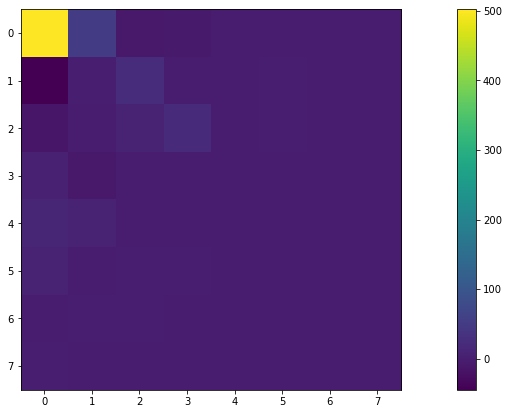

In [22]:
# First make a copy to work on.
tinyDCT_cut = tinyDCT.copy()

# Then zero the pieces below the x + y = 8 line.
for i in range(n):
    for j in range(n):
        if i + j > 8:
            tinyDCT_cut[i,j] = 0.0

show_image(tinyDCT_cut)

In [23]:
round6(tinyDCT_cut)

array([['502.2', '51.9', '-8.2', '-6.3', ' 0.0', '-0.2', '-0.1', ' 0.0'],
       ['-44.8', ' 0.5', '24.0', '-0.0', '-0.3', ' 0.2', '-0.2', '-0.1'],
       ['-12.0', '-0.3', ' 6.6', '20.2', '-0.2', ' 0.1', '-0.4', ' 0.0'],
       [' 5.9', '-7.8', '-0.1', '-0.2', ' 0.0', '-0.0', ' 0.0', ' 0.0'],
       ['14.0', ' 9.2', '-0.2', '-0.1', '-0.2', ' 0.0', ' 0.0', ' 0.0'],
       [' 9.7', '-0.2', ' 0.1', ' 0.2', ' 0.0', ' 0.0', ' 0.0', ' 0.0'],
       ['-0.2', ' 0.2', ' 0.1', ' 0.0', ' 0.0', ' 0.0', ' 0.0', ' 0.0'],
       [' 0.3', '-0.4', ' 0.0', ' 0.0', ' 0.0', ' 0.0', ' 0.0', ' 0.0']],
      dtype='<U5')

Beachtet man alle Nullen unten rechts dort wurden die hohen Frequenzen abgeschnitten.

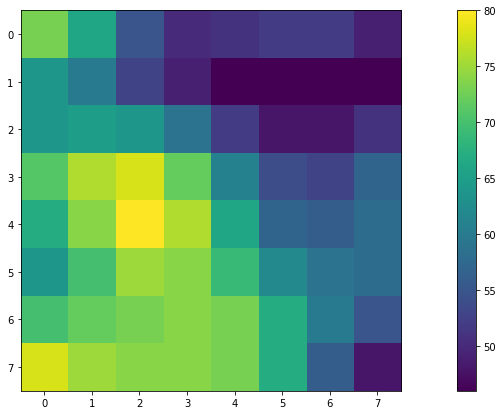

In [24]:
tiny_cut_float = undoDCT(tinyDCT_cut)

# Konvertieren die Floats zurück in uint8, das ursprüngliche Format
tiny_cut = np.vectorize(lambda x: np.uint8(x))(tiny_cut_float) 

show_image(tiny_cut)

In [25]:
tiny_cut

array([[73, 66, 55, 50, 51, 52, 52, 49],
       [64, 60, 53, 49, 46, 46, 46, 46],
       [64, 65, 64, 59, 52, 48, 48, 51],
       [71, 76, 78, 72, 61, 54, 53, 57],
       [67, 74, 80, 76, 66, 57, 56, 58],
       [64, 70, 75, 74, 69, 62, 59, 58],
       [70, 72, 73, 74, 73, 67, 60, 55],
       [78, 75, 74, 74, 73, 67, 56, 48]], dtype=uint8)

Jetzt wurde wieder etwas zurück transformiert, so dass es dem Original sehr nahe kommt, auch wenn fast die Hälfte des transformierten Bildes auf Null gesetzt wurde.

### Bildervergleich Porträt - Landschaft
Die Komprimierung wurde im vorderen Beispiel gut aufgezeigt, aber wie sieht der Unterschied aus bei einem Gesichtsporträt und einer Landschaft. Kann in einem Bild mehr weggelassen werden als bei einem anderen? Es werden hier zuerst immer das Bild mit der Landschaft (Haridwar Indien) berechnet, danach das Bild mit dem Gesicht (Mona Lisa).
Um das Ganze ein bisschen anschaulicher zu gestalten habe ich die Landschaft in 8er Blöcke unterteilt und die Mona Lisa in 8er Blöcke.

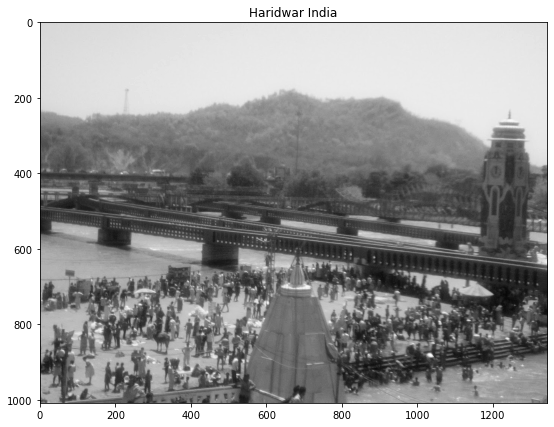

In [26]:
IMREAD_GRAYSCALE = 0
B = 8  # blocksize
image = 'IMG_20190419_120159.jpg'
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE).astype(float)
plt.figure()
plt.imshow(img, cmap="gray")
plt.title("Haridwar India")
plt.show()

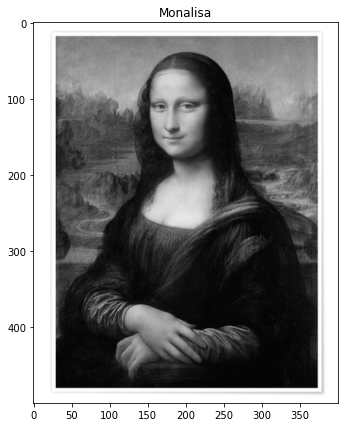

In [27]:
IMREAD_GRAYSCALE = 0
B = 8  # Blockgrösse
image_mona = 'monalisa.jpg'
img_mona = cv2.imread(image_mona, cv2.IMREAD_GRAYSCALE).astype(float)
plt.figure()
plt.imshow(img_mona, cmap="gray")
plt.title("Monalisa")
plt.show()

2D DCT definieren, Koeffizent a wird ist der Parameter für die Anzahl Tranformationen

In [28]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

2D IDCT, welches die Inverse von der DCT ist

In [29]:
def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

DCT berchnen den Blöcken entlang

In [30]:
#Bild Hardiwar
imsize = img.shape
dct = np.zeros(imsize)

# Erstellen von einer 8x8 DCT an dem Bild (in dem Block)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2(img[i:(i+8),j:(j+8)] )

Nun das gleiche mit dem Mona Lisa Bild 8x8 Block

In [31]:
#Bild Mona Lisa
imsize_mona = img_mona.shape
dct_mona = np.zeros(imsize_mona)

# Erstellen von einer 8x8 DCT an dem Bild (in dem Block)
for i in r_[:imsize_mona[0]:8]:
    for j in r_[:imsize_mona[1]:8]:
        dct_mona[i:(i+8),j:(j+8)] = dct2(img_mona[i:(i+8),j:(j+8)] )

Extrahieren von den 8x8-Block des Haridwar-Bild

Text(0.5, 1.0, '8x8 DCT Bildblock_Haridwar-Bild')

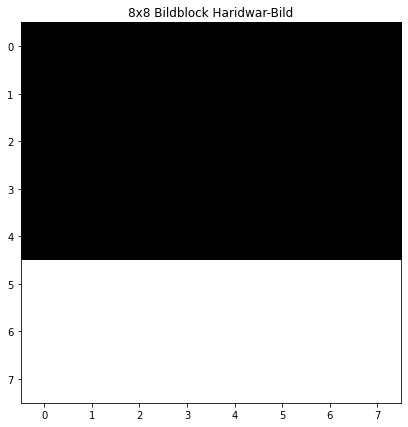

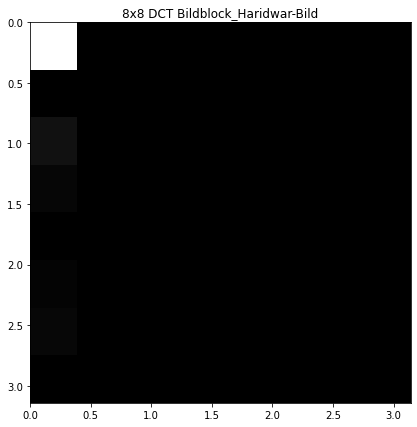

In [32]:
# Bildböcke Haridwar
pos = 8

# Extrahiere von einem Bildblock
plt.figure()
plt.imshow(img[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "8x8 Bildblock Haridwar-Bild")

# Anzeigen von dem DCT in diesem Bildblock
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "8x8 DCT Bildblock_Haridwar-Bild")

Text(0.5, 1.0, '8x8 DCT Bildblock - Mona Lisa Bild ')

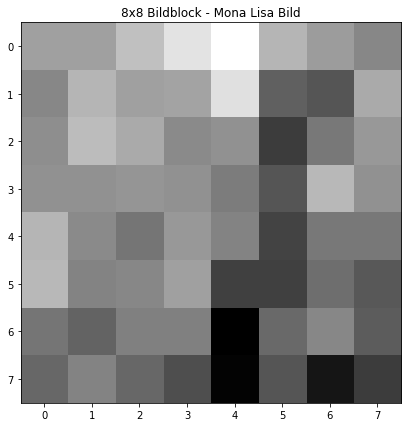

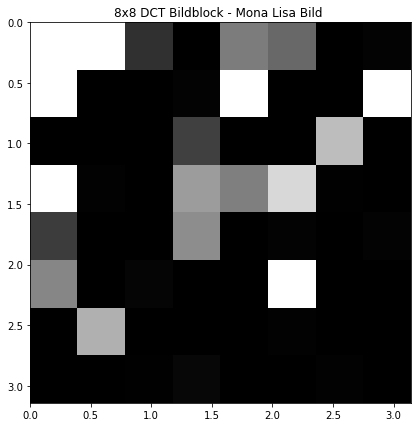

In [33]:
#Bildblöcke Mona Lisa
pos = 128

# Extrahiere von einem Bildblock
plt.figure()
plt.imshow(img_mona[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "8x8 Bildblock - Mona Lisa Bild")

# Anzeigen von dem DCT in diesem Bildblock
plt.figure()
plt.imshow(dct_mona[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title("8x8 DCT Bildblock - Mona Lisa Bild ")

Anzeigen von allen DCT Blocks

Text(0.5, 1.0, '8x8 DCTs von dem Haridwar Bild')

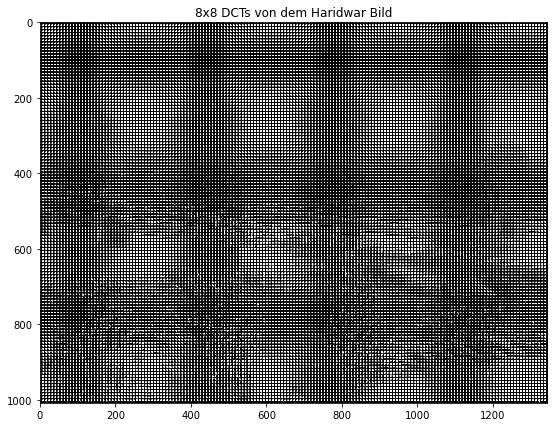

In [34]:
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs von dem Haridwar Bild")

Text(0.5, 1.0, '8x8 DCTs von dem Mona Lisa Bild')

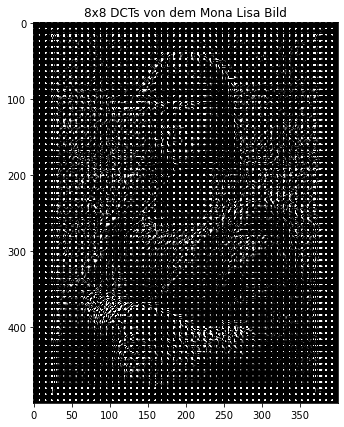

In [35]:
plt.figure()
plt.imshow(dct_mona,cmap='gray',vmax = np.max(dct_mona)*0.01,vmin = 0)
plt.title( "8x8 DCTs von dem Mona Lisa Bild")

Schwellenwert berechnet

Rest 5.953414% von der DCT Koeffizienten


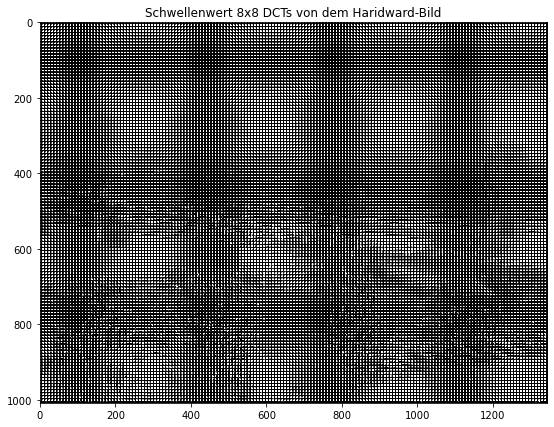

In [36]:
# Schwellenwert für das Haridwar Bild
thresh = 0.01
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Schwellenwert 8x8 DCTs von dem Haridward-Bild")

#Prozentalzahl von denen die nicht 0.0 enthalten.
p_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Rest %f%% von der DCT Koeffizienten" % (p_nonzeros*100.0))

Rest  4.773000% von der DCT Koeffizienten


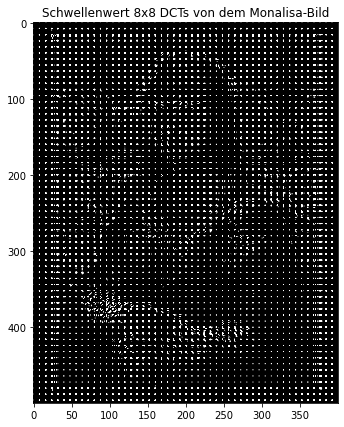

In [37]:
# Schwellenwert
thresh = 0.012
dct_thresh_monalisa = dct_mona * (abs(dct_mona) > (thresh*np.max(dct_mona)))


plt.figure()
plt.imshow(dct_thresh_monalisa,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Schwellenwert 8x8 DCTs von dem Monalisa-Bild")

p_nonzeros_mona = np.sum( dct_thresh_monalisa != 0.0 ) / (imsize_mona[0]*imsize_mona[1]*1.0)

print("Rest  %f%% von der DCT Koeffizienten" % (p_nonzeros_mona*100.0))

Compare DCT compressed image with original

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

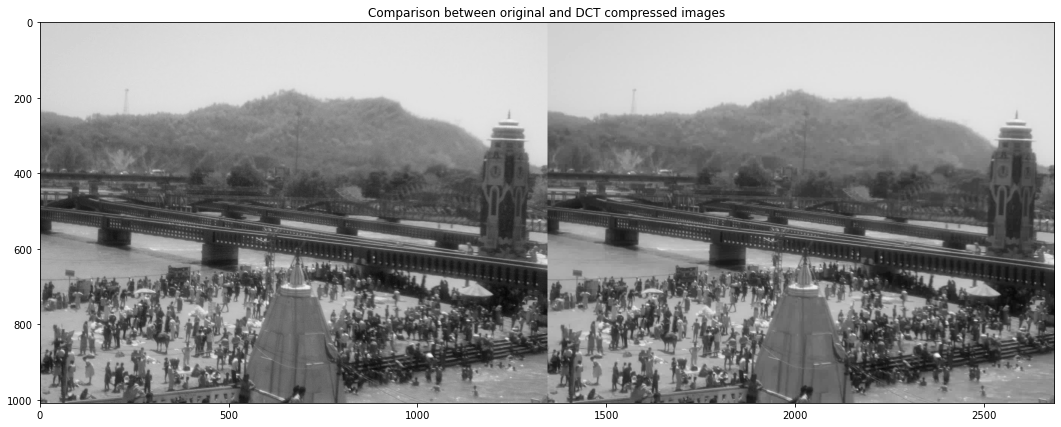

In [38]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (img, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

Text(0.5, 1.0, 'Vergleich zwischen dem Original und dem DCT kompriemierten Monalisa-Bild')

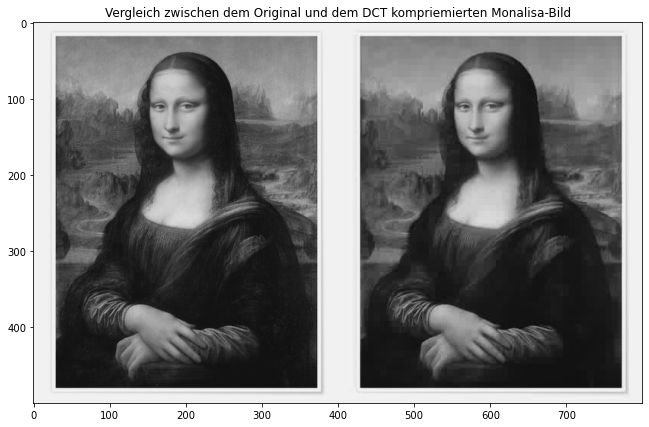

In [39]:
im_dct_mona = np.zeros(imsize_mona)

for i in r_[:imsize_mona[0]:8]:
    for j in r_[:imsize_mona[1]:8]:
        im_dct_mona[i:(i+8),j:(j+8)] = idct2(dct_thresh_monalisa[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (img_mona, im_dct_mona) ) ,cmap='gray')
plt.title("Vergleich zwischen dem Original und dem DCT kompriemierten Monalisa-Bild" )

Hier wird gut erkannt, dass der Schwellenwert bei der Mona Lisa nicht reicht, das Bild konnte nicht mehr in der Qualität zurück tranformiert werden. Hier müsste also der Schwellenwert angepasst werden.

Stellen wir doch das Original, dass mit dem DCT und das DFT (also inklusive des Schwellenwertes) gegenüber

Nur 5.953414% Anteil von dem DCT Koeffizienten
Nur 5.481520% Anteil von dem DCT Koeffizienten


Text(0.5, 1.0, 'Vergleich zwischen dem Original, dem DCT komprimierten und dem DFT komprimierten Bild Haridwar India')

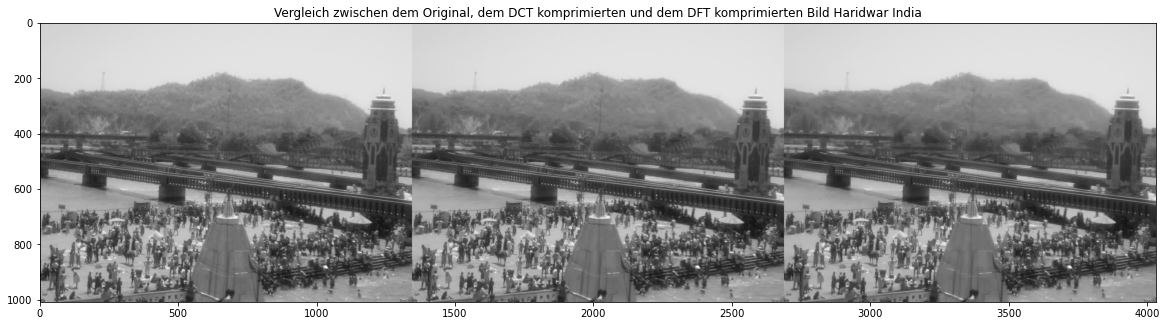

In [40]:
'''
zeros()
Gibt ein neues Array der angegebenen Form und des angegebenen Typs zurück, gefüllt mit Nullen.


r_[]:
Verschiebt Slice-Objekte zur Verkettung entlang der ersten Achse.
[12]
'''

dft = zeros(imsize,dtype='complex');
im_dft = zeros(imsize,dtype='complex');

# 8x8 DFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2( img[i:(i+8),j:(j+8)] )

# Schwellpunkt
thresh = 0.013
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))


p_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Nur %f%% Anteil von dem DCT Koeffizienten" % (p_nonzeros*100.0))
print("Nur %f%% Anteil von dem DCT Koeffizienten" % (p_nonzeros_dft*100.0))

# 8x8 iDFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )

'''
hsstack() :
Stapelt Arrays horizontal (spaltenweise).
Dies entspricht der Verkettung entlang der zweiten Achse, 
ausser bei 1-D-Arrays, bei denen die Verkettung entlang der ersten Achse erfolgt.
Baut durch hsplit geteilte Arrays wieder auf.
[12]
'''       

plt.imshow( np.hstack( (img, im_dct, abs(im_dft)) ) ,cmap='gray')
plt.title("Vergleich zwischen dem Original, dem DCT komprimierten und dem DFT komprimierten Bild Haridwar India" )
        

Nur 4.773000% Anteil von dem DCT Koeffizienten
Nur 44.135500% Anteil von dem DCT Koeffizienten


Text(0.5, 1.0, 'Vergleich zwischen dem Original, dem DCT komprimierten und dem DFT komprimierten Bild Mona Lisa')

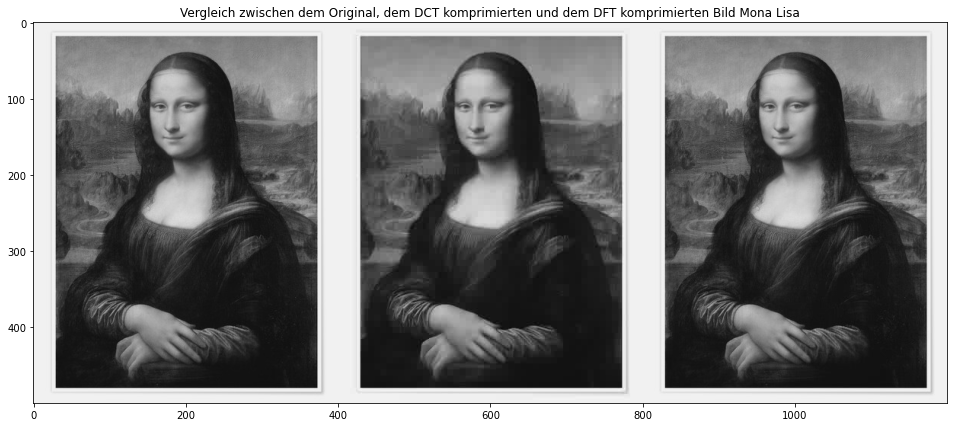

In [41]:
dft_mona = zeros(imsize_mona,dtype='complex');
im_dft_mona = zeros(imsize_mona,dtype='complex');

# 8x8 DFT
for i in r_[:imsize_mona[0]:8]:
    for j in r_[:imsize_mona[1]:8]:
        dft_mona[i:(i+8),j:(j+8)] = np.fft.fft2( img_mona[i:(i+8),j:(j+8)] )

# Thresh
thresh = 0.0013
dft_thresh_mona = dft_mona * (abs(dft_mona) > (thresh*np.max(abs(dft_mona))))


p_nonzeros_dft_mona = np.sum( dft_thresh_mona != 0.0 ) / (imsize_mona[0]*imsize_mona[1]*1.0)
print("Nur %f%% Anteil von dem DCT Koeffizienten" % (p_nonzeros_mona*100.0))
print("Nur %f%% Anteil von dem DCT Koeffizienten" % (p_nonzeros_dft_mona*100.0))

# 8x8 iDFT
for i in r_[:imsize_mona[0]:8]:
    for j in r_[:imsize_mona[1]:8]:
        im_dft_mona[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh_mona[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (img_mona, im_dct_mona, abs(im_dft_mona)) ) ,cmap='gray')
plt.title("Vergleich zwischen dem Original, dem DCT komprimierten und dem DFT komprimierten Bild Mona Lisa" )
        

Wie erwartet, ist kaum ein Unterschied erkennbar. Also nicht wirklich ein Unterschied erkennbar zwischen Landschaft und Mona Lisa.

Wie in der Einleitung erwähnt, wird in dieser Arbeit noch eine andere Bibliothek verwendet opencv-python. Diese Vorgehensweise ist sehr intressant und wahnsinnig effizient gegenüber dem oberen Beispiel.

500
400


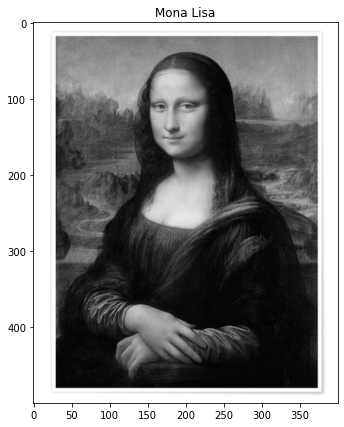

In [42]:
IMREAD_GRAYSCALE = 0
B = 8  # Blockgrösse
image = 'monalisa.jpg'
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
h, w = np.array(img.shape[:2]) / B * B
h = int(h)
w = int(w)
print(h)
print(w)
img = img[:h, :w]
plt.figure()
plt.imshow(img, cmap="gray")
plt.title("Mona Lisa")
plt.show()

Auf jeden Block des Bildes wird die DCT angewendet.

Das transformierte Bild wird in der Variablen Trans gespeichert

In [43]:
blocksV = h / B
blocksH = w / B
vis = np.zeros((h, w), np.float32)
Trans = np.zeros((h, w), np.float32)
vis[:h, :w] = img

for row in range(int(blocksV)):
    for col in range(int(blocksH)):
        currentblock = cv2.dct(vis[row * B:(row + 1) * B, col * B:(col + 1) * B])
        Trans[row * B:(row + 1) * B, col * B:(col + 1) * B] = currentblock

Als nächstes wird der Benutzer aufgefordert, einen Bereich im angezeigten Bild zu markieren, indem er in das Bild klickt. Der Block um die angeklickte Position wird im Kasten hervorgehoben:

Der ausgewählte Block und seine DCT-Transformation werden dann in eine zweite Matplotlib-Figur eingezeichnet:

Text(0.5, 1.0, 'Bild in der selektionierten Region')

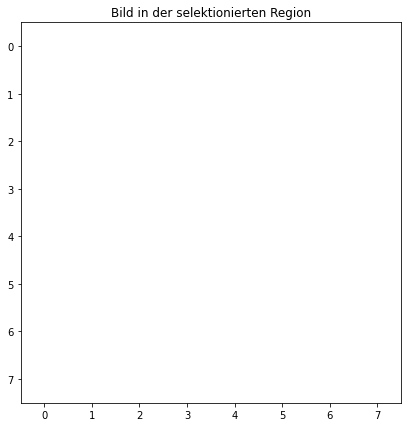

In [44]:
plt.figure()
plt.subplot(1, 2, 1)
selectedImg = img[row * B:(row + 1) * B, col * B:(col + 1) * B]
N255 = Normalize(0, 255)  # Normalization object, used by imshow()
plt.imshow(selectedImg, cmap="gray", norm=N255, interpolation='nearest')
plt.title("Bild in der selektionierten Region")

Text(0.5, 1.0, 'DCT tranformieren in den gegeben Blöcken')

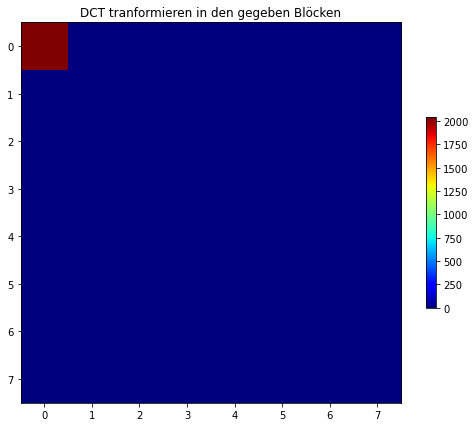

In [45]:
plt.subplot(1, 2, 2)
selectedTrans = Trans[row * B:(row + 1) * B, col * B:(col + 1) * B]
plt.imshow(selectedTrans, cmap=cm.jet, interpolation='nearest')
plt.colorbar(shrink=0.5)
plt.title("DCT tranformieren in den gegeben Blöcken")

Dann wird die IDCT angewendet, um das ursprüngliche Bild aus der transformierten Darstellung zu rekonstruieren.

Das rekonstruierte Bild wird in der Variablen "back" gespeichert und in der Datei zurück_tranformiertes_Bild.jpg abgespeichert:

In [46]:
back = np.zeros((h, w), np.float32)
for row in range(int(blocksV)):
    for col in range(int(blocksH)):
        currentblock = cv2.idct(Trans[row * B:(row + 1) * B, col * B:(col + 1) * B])
        back[row * B:(row + 1) * B, col * B:(col + 1) * B] = currentblock

Um zu überprüfen, ob DCT und IDCT verlustfrei sind, wird die mittlere absolute Differenz (Absolute Differenz, AD) zwischen dem Original und dem rekonstruierten Bild berechnet und auf der Konsole ausgegeben.

Das rekonstruierte Bild wird in einer Matplotlib-Figur gezeichnet:

3.0517578e-05
-255.0
Absolute Differenz:  2.0400003125


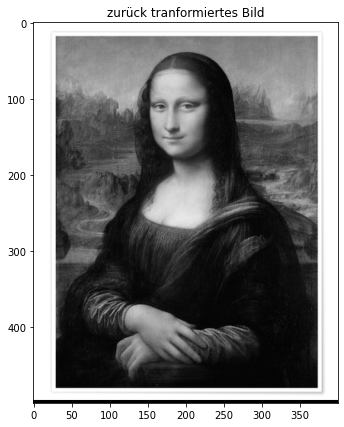

In [47]:
diff = back - img
print(diff.max())
print(diff.min())
AD = np.sum(np.abs(diff)) / float(h * w)
print("Absolute Differenz: ", AD)
plt.figure()
plt.imshow(back, cmap="gray")
plt.title("zurück tranformiertes Bild")
plt.show()

## Diskussion & Konklusion

Zusammengefast gemäss Johannes Mauche [5] werden bei der 1-Dimensionalen diskreten Kosinustransformation die n zu transformierender Werter als Stützstellendarstellung einer Funktion erfasst, wobei n Stützstellen zwischen 0 und 𝜋 festgelegt werden. Dabei wird die Funktion nun von der Stützstellendarstellung in die Koeffizientendarstellung umgewandelt, und somit als letztes als gewichtete Summe von den Basisfunktionen dargestellt. Die Basisfunktionen sind die Kosinusfunktionen cos(i * x). Die Transformation entspricht einer Vektor-Matrix-Multiplikation.

Die 2-dimensionale diskrete Kosinustransformation lässt sich auf den 1-Dimensionalen Vorgehen zurückführen. Die Transformation entspricht zwei Matrix-Multiplikationen. [11]

Die Beobachtungen haben ergeben, dass sich Landschaften etwas mehr komprimiert werden können als das Porträt. Das ist der Schwellenwert etwas höher als bei den Landschaften. Es handelt sich jedoch um ein Tausendstel als nicht der Rede wert. Diese Semesterarbeit war etwas aufwändig, es können aus so vielen Quellen Informationen geholt werden, dass es fast schwierig ist, zu entscheiden aus welchen die Informationen auch wirklich gezogen werden sollen. Ich habe mich deshalb entschieden, dass meiste aus unserem eigenen Modulkurs zu ziehen. Ich fand die Bibliothek open_cv eine sehr gute Bibliothek, diese fand ich sehr einfach anzuwenden und macht den ganze Code überschaulicher. Plus die Komprimierung ist überschaubarerer durch den Schwellenwert der Hinzugefügt wird.

Im Grossen und Ganzen eine aufwändige, aber sehr spannende Semesterarbeit, die Klarheit geschaffen hat.


## Quelle

[1] Einführung zur diskreten Kosinustransformation (Jupyter Notebook), _Markus Guess, 2021,_ verfügbar online: https://moodle.ffhs.ch/course/view.php?id=9255#section-6, Zugriff: [15.11.2021]

[2] OpenCV, verfügbar online: https://en.wikipedia.org/wiki/OpenCV, Zugriff [04.12.2021]

[3] Module-scipy.fft, verfügbar online: https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft, Zugriff [04.12.2021]

[4] Scipy.fftpack.dct.html, verfügbar online: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html, Zugriff [04.12.2021]

[5] Transformations ,_Johannes Mauche, 2013,_ verfügbar online: https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/transforms.html, Zugriff [04.12.2021]

[6] Opencv-python, verfügbar online: https://pypi.rg/project/opencv-python/, Zugriff [04.12.2021]

[7] Teil 3 der Semesterarbeit: Diskrete Kosinustransformation,_Markus Geuss, 2021,_ verfügbar online:  https://moodle.ffhs.ch/mod/assign/view.php?id=3892150, Zugriff [04.12.2021]

[8] JPEG DCT Demo, _Frank Ong, 2016,_ verfügbar online: https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html, Zugriff: [10.12.2021]

[9] A simple transform coding example, _Dave Marshall, 2001,_ verfügbar online: https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/node219.html#SECTION04251100000000000000, Zugriff [04.12.2021]

[10] Weitz, Kapitel DCT, _Edmund Weitz, 2016,_ verfügbar online: http://weitz.de/dct/, Zugriff: [09.12.2021]

[11] Algorithmen, Kapitel DCT, _H.W.Lang, 2018, Hochschule Flenzburg_, verfügbar online: https://www.inf.hs-flensburg.de/lang/algorithmen/fft/dct.htm, Zugriff: [09.12.2021]

[12] Numpy, verfügbar online: https://numpy.org/, Zugriff: [09.12.2021]

[13] Mathematik für Informatiker, _Rolf Socher_, _2011_, Verlag Fachbuchverlag Leipzig im Carl Hanser Verlag

[14] Konkrete Mathematik (nicht nur) für Informatiker, _Weiz Edmund, 2018_,  (http://weitz.de/KMFI/)